Initial Dataset Shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64

Before Oversampling:
Class
0    199020
1       344
Name: count, dtype: int64

Imbalance Ratio (Before SMOTE): 578.55 : 1

After SMOTE Oversampling:
Class
0    199020
1    199020
Name: count, dtype: int64
Imbalance Ratio (After SMOTE): 1.00 : 1

Model Evaluation:
Accuracy:  0.9702
Precision: 0.0469
Recall:    0.8378
F1 Score:  0.0888

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.84      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.54     85443
weighted avg       1.00      0.97      0.98     85443



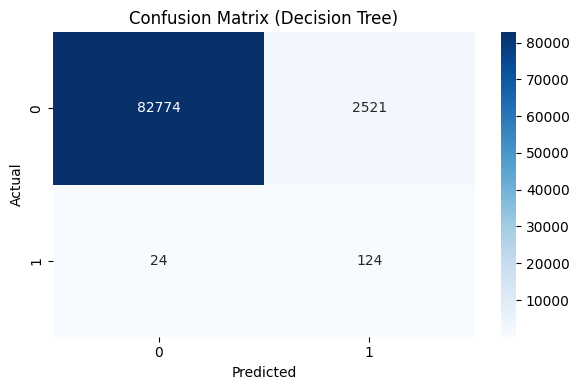

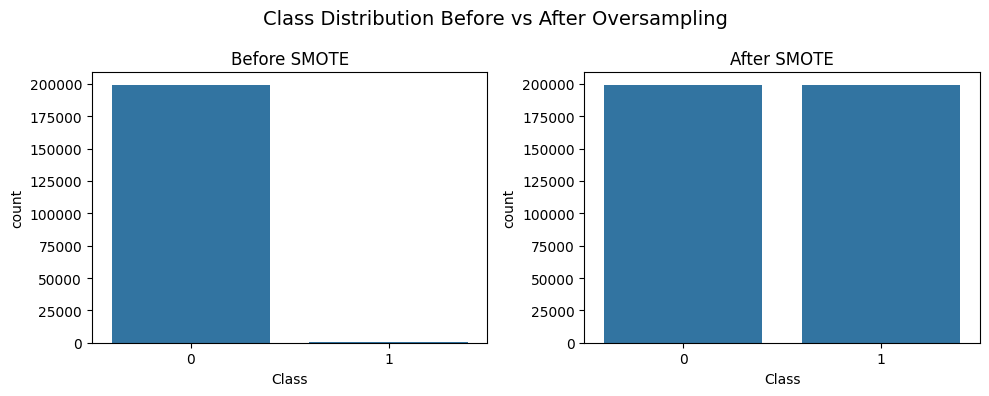

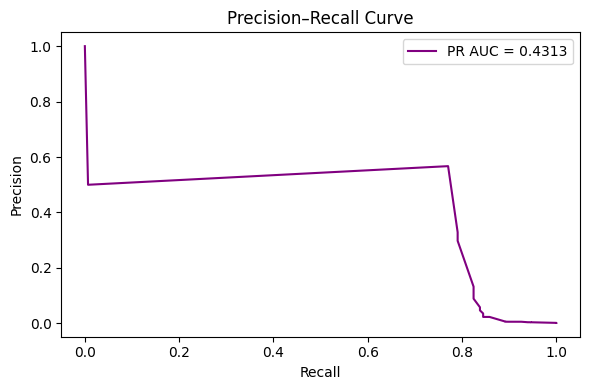


 Model saved as 'decision_tree_model.pkl'
 Graphs saved: 'class_distribution_comparison.png', 'confusion_matrix.png', 'precision_recall_curve.png'


In [1]:
# credit_card_fraud_detection_decision_tree.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ========================================
# LOAD DATASET
# ========================================
df = pd.read_csv("creditcard.csv")
print("Initial Dataset Shape:", df.shape)
print(df['Class'].value_counts())

# ========================================
# FEATURE SCALING
# ========================================
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ========================================
# TRAIN-TEST SPLIT
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

print("\nBefore Oversampling:")
print(y_train.value_counts())

# ========================================
# CLASS IMBALANCE RATIOS
# ========================================
imbalance_ratio_before = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"\nImbalance Ratio (Before SMOTE): {imbalance_ratio_before:.2f} : 1")

# ========================================
# APPLY SMOTE OVERSAMPLING
# ========================================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE Oversampling:")
print(y_train_res.value_counts())

imbalance_ratio_after = y_train_res.value_counts()[0] / y_train_res.value_counts()[1]
print(f"Imbalance Ratio (After SMOTE): {imbalance_ratio_after:.2f} : 1")

# ========================================
# SAVE THE OVERSAMPLED DATA
# ========================================
oversampled_data = pd.DataFrame(X_train_res)
oversampled_data['Class'] = y_train_res.values
oversampled_data.to_csv("oversampled_creditcard_data.csv", index=False)

# ========================================
# TRAIN DECISION TREE CLASSIFIER
# ========================================
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_res, y_train_res)

# ========================================
# EVALUATION
# ========================================
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ========================================
# CONFUSION MATRIX VISUALIZATION
# ========================================
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

# ========================================
# CLASS DISTRIBUTION GRAPH (Before & After)
# ========================================
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE")
sns.countplot(x=y_train_res, ax=ax[1])
ax[1].set_title("After SMOTE")
plt.suptitle("Class Distribution Before vs After Oversampling", fontsize=14)
plt.tight_layout()
plt.savefig("class_distribution_comparison.png", dpi=300)
plt.show()

# ========================================
# PRECISION-RECALL CURVE
# ========================================
y_prob = clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='purple', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig("precision_recall_curve.png", dpi=300)
plt.show()

# ========================================
# SAVE THE MODEL
# ========================================
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(clf, f)

print("\n Model saved as 'decision_tree_model.pkl'")
print(" Graphs saved: 'class_distribution_comparison.png', 'confusion_matrix.png', 'precision_recall_curve.png'")


In [1]:
df.shape

NameError: name 'df' is not defined